<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/XMIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')
df2 = df[df['train'] == 1]
print(df2['y'].max())
ymax_train1 = df2['y'].max()
# sve sa train = 0 y = max(y) + 1

#for i in range(df.shape[0]):
 # if(df.iloc[i]['train'] == 0):
  #  df.loc[i, 'y'] = ymax_train1 + 1

lower_bound = df['n'] * df['av.length'] / df['m']
lower_bound = lower_bound.astype('int') + 1

upper_bound = np.minimum(df[' LPTUB'], df[' SLACKUB'])
df['rel. bound'] = (upper_bound-lower_bound)/(upper_bound)
df['rel. bound'] = df['rel. bound']*10000

df['category'] = df['y']
for i in range(df.shape[0]):
  #print(df.iloc[i]['y'])
  if(df.iloc[i]['y'] < 1):
    df.loc[i, 'category'] = 0
  elif(df.iloc[i]['y'] >= 1 and df.iloc[i]['y'] < 10):
    df.loc[i, 'category'] = 1
  else:
    df.loc[i, 'category'] = 2

print(df['category'].max())
print(df['y'].max())

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = [ 'index', 'inst.name','type', 'CPLEXStatus', ' LPTUB', 'train', ' SLACKUB'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




19.907111
2.0
19.907111


In [2]:
y_new = []
for val in y:
  if(val<1):
    y_new.append(0)
  elif(1 <= val and val <10):
    y_new.append(1)
  else:
    y_new.append(2)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = ['min', 'n/m', 'std.dev','av.length']
X_modified = X.drop([  'indeks',  '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
print(X_modified.head())
# n, class, subtype, 'rel. bound','av.length'


from imblearn.over_sampling import RandomOverSampler

category = X_modified['category']
tmp = X_modified.drop(['category'], axis = 1)
tmp['y_enc'] = y_encoded


oversample = RandomOverSampler(random_state=0)
tmp, category = oversample.fit_resample(tmp, category.astype('int'))

tmp = tmp.sample(frac = 1).reset_index()
y_encoded = tmp['y_enc']
X_modified = tmp.drop(['y_enc'], axis = 1)
print(X_modified.shape[0])
print(X_modified.head())


   subtype  class    n   m    n/m       m/n   av.length     std.dev  median  \
0       13      6  120  12  10.00  0.100000  301.058319  106.808502   292.0   
1        5      6  144  48   3.00  0.333333  362.854156  129.468353   352.0   
2        8      1  180  45   4.00  0.250000   50.616665   29.712069    49.0   
3        4      3  154  56   2.75  0.363636   72.902596   14.470963    71.5   
4        1      2   80  40   2.00  0.500000   62.562500   24.930712    61.5   

   range  min  max    k         y  rel. bound  category  
0    359  120  479  106  0.001009   23.194168       0.0  
1    427  148  575  120  0.187658  396.825397       0.0  
2     99    1  100   85  0.001098  193.236715       0.0  
3     49   50   99   45  2.430405  563.380282       1.0  
4     80   20  100   51  1.936154  454.545455       1.0  
21840
   index  subtype  class    n   m   n/m       m/n   av.length     std.dev  \
0  11599        4      7   66  24  2.75  0.363636  279.787872   64.138435   
1   3940        1

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = X_train.drop(['y'], axis = 1)
print(X_train.head())

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = X_test.drop(['y'], axis = 1)

X_test = sc.transform(X_test)


19656
2184
       index  subtype  class    n   m   n/m       m/n   av.length     std.dev  \
13709   8198        4      5  198  72  2.75  0.363636   99.484848   46.071640   
3388   15110        4      7  198  72  2.75  0.363636  800.040405  203.103653   
15259    186       12      7   18   2  9.00  0.111111   75.333336   15.575245   
5806   14329        3      6  100  40  2.50  0.400000  256.209991   94.373779   
15796   1157        5      1   36  12  3.00  0.333333   51.388889   31.193663   

       median  range  min   max    k  rel. bound  
13709    99.0    215    1   216  121  486.111111  
3388    819.0   1024  225  1249  179  463.604853  
15259    76.5     60   47   107   17  -14.749263  
5806    270.0    297  103   400   91  138.461538  
15796    56.0     96    2    98   31  372.670807  


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(16, input_dim = X_modified.shape[1]-1, activation='relu'))

classifier.add(Dropout(0.125))
classifier.add(Dense(12, activation = 'relu'))

classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(3, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 32, 
                    epochs = 120, shuffle = True)


Epoch 1/120
615/615 [==============================] - 4s 4ms/step - loss: 0.4087 - accuracy: 0.8332
Epoch 2/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1797 - accuracy: 0.9339
Epoch 3/120
615/615 [==============================] - 3s 5ms/step - loss: 0.1512 - accuracy: 0.9396
Epoch 4/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1317 - accuracy: 0.9450
Epoch 5/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1202 - accuracy: 0.9498
Epoch 6/120
615/615 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9526
Epoch 7/120
615/615 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9551
Epoch 8/120
615/615 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9547
Epoch 9/120
615/615 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9584
Epoch 10/120
615/615 [==============================] - 1s 2ms/step - loss: 0.0957 - accura

accuracy: 96.75%


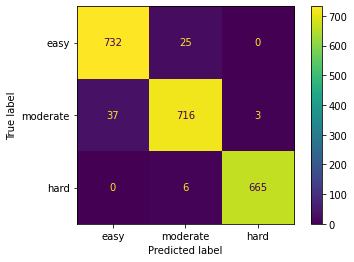

In [8]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard'])

cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


ROC AUC score: 0.9759171582958771


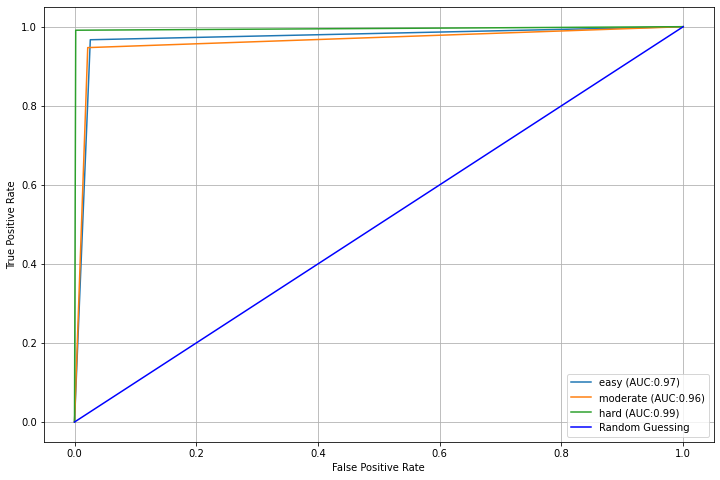

In [9]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()

In [10]:
column_names = ['std.dev', 'rel. bound', 'min', 'av.length', 'm', 'y']
df_reg = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 2):
    dictionary = {'std.dev' : X_test_copy.iloc[i]['std.dev'], 'min': X_test_copy.iloc[i]['min'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_reg = df_reg.append(dictionary, ignore_index = True)

2184
2184


In [11]:
column_names = ['class', 'rel. bound', 'min', 'n', 'av.length', 'y']
df_regm = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 1):
    dictionary = {'class' : X_test_copy.iloc[i]['class'], 'min': X_test_copy.iloc[i]['min'], 'n' : X_test_copy.iloc[i]['n'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_regm = df_regm.append(dictionary, ignore_index = True)

2184
2184


In [12]:
column_names = ['n/m', 'rel. bound', 'm', 'av.length', 'y']
df_rege = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 0):
    dictionary = {'n/m' : X_test_copy.iloc[i]['n/m'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_rege = df_rege.append(dictionary, ignore_index = True)

2184
2184


In [13]:
print(df_reg.head(5))
print(df_regm.head(5))
print(df_rege.head(5))

yy_final = []
predd_final = []

      std.dev   rel. bound    min   av.length     m          y
0  202.547165   712.954334  257.0  797.034973  80.0  12.690728
1  209.457199   533.130236  177.0  903.859070  80.0  15.383772
2  198.105713   451.667370  330.0  822.500000  72.0  11.765514
3  102.894897   666.023166  143.0  386.790009  40.0  10.216122
4   18.155994  1032.028470   40.0  100.695000  80.0  11.786852
   class   rel. bound    min      n   av.length         y
0    3.0  1099.476440   50.0   54.0   75.537041  1.470719
1    2.0   337.837838   20.0  108.0   63.546295  3.002270
2    4.0   919.117647   46.0  160.0   98.637497  2.431016
3    7.0   786.686838   85.0   60.0  243.283340  3.491532
4    6.0   400.000000  121.0  120.0  299.683319  1.773875
   n/m  rel. bound      m   av.length         y
0  6.0    0.000000   27.0   75.382713  0.000107
1  3.0  359.820090   54.0  428.475311  0.201271
2  5.0  155.038760   28.0  101.599998  0.001273
3  9.0   18.235696   14.0  486.468262  0.001489
4  2.0  251.207729  100.0  504.084

In [14]:
shuffled = df_reg.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [15]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 20/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu'))
    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [16]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


34/34 [==============================] - 1s 2ms/step - loss: 11.9776
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7.8161
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 5.9644
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 5.0083
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 4.6994
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 4.5489
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 4.3942
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 4.1358
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3.9517
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3.8869
Epoch 11/300
34/34 [==============================] - 0s 3ms/step - loss: 3.8822
Epoch 12/300
34/34 [==============================] - 0s 2ms/step - loss: 3.6705
Epoch 13/300
34/34 [============================

In [17]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

9/9 [==============================] - 0s 2ms/step
r_square score:  0.8396038023636927
RMSE:


0.8886270117454352

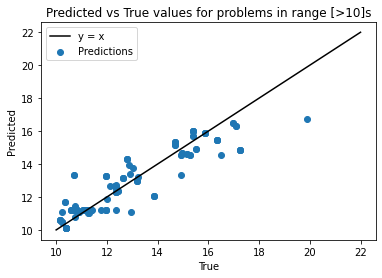

In [18]:
x = np.linspace(10, 22, 100)
y = x
plt.title('Predicted vs True values for problems in range [>10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [19]:
shuffled = df_regm.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [20]:

def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu'))

    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [21]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


38/38 [==============================] - 1s 2ms/step - loss: 10.0479
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 7.9014
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 6.5857
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 5.4342
Epoch 5/300
38/38 [==============================] - 0s 3ms/step - loss: 4.6464
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 4.1212
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 3.8390
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 3.7071
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 3.2677
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3163
Epoch 11/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3406
Epoch 12/300
38/38 [==============================] - 0s 2ms/step - loss: 3.2254
Epoch 13/300
38/38 [============================

In [22]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])
print("RMSE:")
sqrt(mean_squared_error(yy, predd))

10/10 [==============================] - 0s 3ms/step
r_square score:  0.48500328428027006
RMSE:


1.6760992101835788

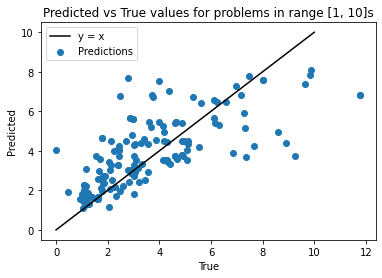

In [23]:
x = np.linspace(0, 10, 100)
y = x
plt.title('Predicted vs True values for problems in range [1, 10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [24]:
shuffled = df_rege.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [25]:
def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 1/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(12, input_dim=X_modified.shape[1], activation='relu'))
        
    model.add(Dropout(0.25))



    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [26]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


39/39 [==============================] - 1s 2ms/step - loss: 0.4012
Epoch 2/300
39/39 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 3/300
39/39 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 4/300
39/39 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 5/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 6/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 7/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 8/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 9/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2586
Epoch 10/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 11/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 12/300
39/39 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 13/300
39/39 [=============================

In [27]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

10/10 [==============================] - 0s 2ms/step
r_square score:  0.08852016140382846
RMSE:


0.38782916245630783

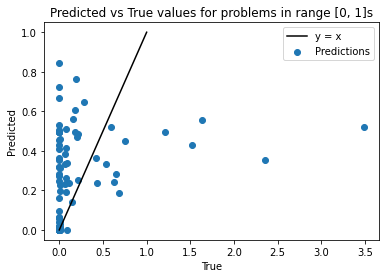

In [28]:
x = np.linspace(0, 1, 100)
y = x
plt.title('Predicted vs True values for problems in range [0, 1]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [29]:
print("r_square score: ", r2_score(yy_final, predd_final))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(yy_final)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(predd_final)
#predd = np.power(predd, 10)/10

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

r_square score:  0.9598044854236627
RMSE:


1.1209644173411757

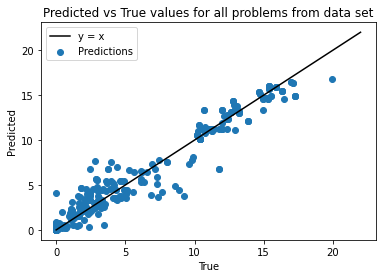

In [30]:
x = np.linspace(0, 22, 2000)
y = x

plt.title('Predicted vs True values for all problems from data set')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy_final, predd_final)
plt.legend(['y = x', 'Predictions'])